In [4]:
import pandas as pd

In [5]:
cols = ['Sex', 'Length' ,'Diameter','Height','Whole weight','Shucked weight',
        'Viscera weight','Shell weight', 'Rings']

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names = cols)

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.shape

(4177, 9)

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Separate Input and Output Data

In [10]:
x = df.drop('Rings', axis = 1)
y = df['Rings']

In [11]:
len(set(y))

28

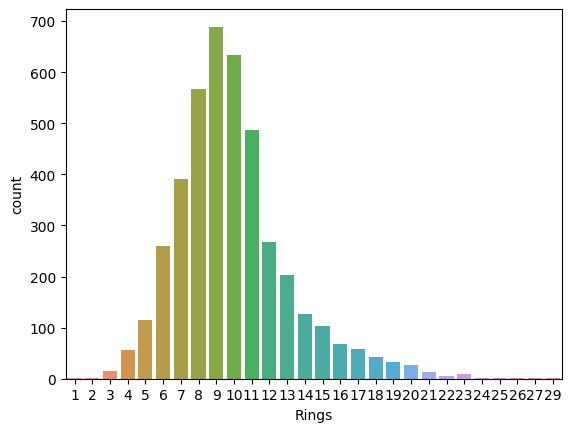

In [12]:
import seaborn as sns 
sns.countplot(x=y);

In [13]:
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [14]:
x.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [16]:
# pip install imbalanced-learn

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state = 0)

In [19]:
x_res, y_res = ros.fit_resample(x, y)

In [20]:
x_res.shape

(19292, 8)

In [21]:
y_res.value_counts()

15    689
7     689
25    689
27    689
2     689
29    689
23    689
26    689
3     689
1     689
22    689
17    689
21    689
6     689
4     689
5     689
13    689
18    689
12    689
11    689
14    689
19    689
16    689
20    689
8     689
10    689
9     689
24    689
Name: Rings, dtype: int64

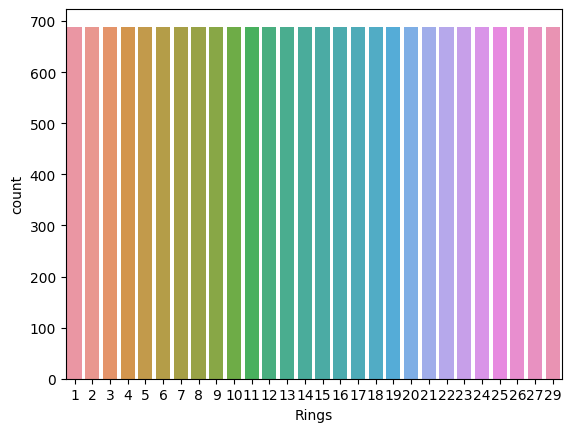

In [22]:
sns.countplot(x=y_res);

## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_res['Sex'] = le.fit_transform(x_res['Sex'])

In [24]:
x_res['Sex'].value_counts()

0    7076
2    6679
1    5537
Name: Sex, dtype: int64

In [25]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

## Nomralization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
x_scaled = scaler.fit_transform(x_res, y_res)

In [29]:
pd.DataFrame(x_scaled, columns = x.columns).describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000
mean,0.489711,0.587203,0.580548,0.127104,0.330468,0.237105,0.246077,0.297742
std,0.422079,0.243847,0.250860,0.053347,0.222544,0.162062,0.165354,0.210349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.486486,0.470588,0.097345,0.137197,0.105582,0.106649,0.115595
50%,0.500000,0.662162,0.663866,0.141593,0.345759,0.246133,0.249506,0.297459
75%,1.000000,0.770270,0.756303,0.163717,0.497255,0.348689,0.373272,0.456901
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cross-Validation

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test  = train_test_split(
    x_scaled, y_res, random_state = 0, test_size = 0.25)

In [38]:
x_train.shape

(14469, 8)

In [39]:
x_test.shape

(4823, 8)

## Build the Classification Machine Learning Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
df = DecisionTreeClassifier(random_state = 0)

In [42]:
df.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

## Performance Evaluation 

In [43]:
y_pred = df.predict(x_test)

In [44]:
y_pred

array([ 2, 15, 16, ..., 27, 14, 18])

In [45]:
result = pd.DataFrame((
    'actual': y_test,
    'Predicted': y_pred))


SyntaxError: invalid syntax (1500073581.py, line 2)

## Mean Absolute Error

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_pred)

0.8847190545303752

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       165
           3       0.99      1.00      1.00       164
           4       0.99      1.00      0.99       170
           5       0.91      0.99      0.95       177
           6       0.82      0.83      0.83       186
           7       0.69      0.76      0.72       168
           8       0.46      0.36      0.41       183
           9       0.22      0.17      0.19       150
          10       0.38      0.30      0.33       159
          11       0.63      0.55      0.59       173
          12       0.79      0.81      0.80       172
          13       0.77      0.93      0.84       177
          14       0.90      0.96      0.93       162
          15       0.91      1.00      0.95       155
          16       0.93      1.00      0.96       166
          17       0.98      1.00      0.99       188
          18       0.98    

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
new1 = [[2, 0.440, 0.365, 0.125, 0.5160, 0.2155, 0.1140, 0.155]]

In [51]:
new1 = scaler.transform(new1)

In [52]:
new1

array([[1.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462]])

In [53]:
df.predict(new1)

array([10])

## Linear Regression 

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(x_test)

In [58]:
y_pred

array([ 1.66868576, 15.46978159, 26.67783678, ..., 25.31872197,
       13.30282795, 18.80498081])

In [59]:
result = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})

In [60]:
result

,actual,Predicted
5165,2,1.668686
10529,15,15.469782
10966,16,26.677837
14418,21,18.956115
16095,24,26.472489
...,...,...
13938,21,18.956115
11044,16,13.637532
18333,27,25.318722
9816,14,13.302828


## Mean Absolute Error

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(result['actual'], result['Predicted'])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.565273377606124


In [62]:
sum(abs(y_test - y_pred))/len(y_test)

2.5652733776061276

In [63]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

22.258517643891224

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.565273377606124

In [65]:
import numpy as np

In [66]:
np.mean(y_test)

14.63611859838275

In [67]:
mean_absolute_error(y_test, y_pred)/np.mean(y_test) * 100

17.527005950126558

In [78]:
sum(abs((y_test - y_pred)/y_test))/len(y_test)

0.2225851764389107

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

11.562352730165331

In [80]:
# RMSE
np.sqrt(sum((y_test - y_pred) ** 2)/ len(y_test))

3.400345972127729

In [81]:
# R2 Score, Coefficient of Determination, Linearity measurement
regressor.score(x_train, y_train) * 100

82.02335893377499

In [82]:
new1 = [[2, 0.440, 0.365, 0.125, 0.5160, 0.2155, 0.1140, 0.155]]

In [83]:
new1 =scaler.transform(new1)

In [75]:
regressor.predict(new1)

array([12.67694261])

In [85]:
result = pd.DataFrame((
    'actual': y_test,
    'classifier': df.predict(x_test),
    'regressor': regressor.predict(x_test)
))

SyntaxError: invalid syntax (683500848.py, line 2)

In [84]:
result

,actual,Predicted
5165,2,1.668686
10529,15,15.469782
10966,16,26.677837
14418,21,18.956115
16095,24,26.472489
...,...,...
13938,21,18.956115
11044,16,13.637532
18333,27,25.318722
9816,14,13.302828
